### 0. Load libraries and custom functions
* If files are not available for plotting, please run get_data.ipynb to download/generate the files.

In [20]:
from visualizationfunctions import plot_total_stations_interactive, plot_frequent_stations_interactive

import ipywidgets as widgets

# Initialize column variables for interactive plots.
subway_cols = [
    'net_entries']

socio_cols = [
    'Population',
    'Disabled population',
    'Foreign-born population',
    'Population aged 65+',
    'Median household income (2021$)',
    'Poverty rate',
    'Labor force participation rate',
    'Population aged 25+ without a high school diploma',
    'Unemployment rate',
    'Severely rent-burdened households',
    'Homeownership rate',
    'Severe crowding rate (% of renter households)',
    'Population density (1,000 persons per square mile)',
    'Car-free commute (% of commuters)',
    'Mean travel time to work (minutes)',
    'Serious crime rate (per 1,000 residents)']

### 1. Plot the following to see trends and patterns in station commuter traffic in Jan-Jun 2022:
- total and monthly station count for each day of the month
- total and monthly station count for each hour or the day
- total and monthly station count for each weekday
- total trip count for each borough

In [21]:
m = widgets.interactive(plot_total_stations_interactive, entry_or_exit = ["Entry", "Exit"])
display(m)

interactive(children=(Dropdown(description='entry_or_exit', options=('Entry', 'Exit'), value='Entry'), Output(…

#### Findings:
- Taxi rides are quite evenly spread throughout the months; no distinct or interesting trends in taxi rides for each day of the month.
- Peak time for taxi rides appears to be around 6pm.
- Slightly fewer taxi rides on Monday and Sunday.
- Trip counts are lower in January and February, probably due to more tightened covid restrictions at the time.
- Around 90% of taxi rides started or ended in Manhattan; almost 99% of taxi rides were picked up in Manhattan and Queens, and there were slightly more drop-offs in Brooklyn compared to pick-ups.

### 3. Plot sum and average of passenger count for each CDTA on the map of NYC.

In [ ]:
def plot_on_map_interactive(exclude_manhattan):
    """
    Create a small multiple where each choropleth visualizes a taxi trip variable/stat on a map of NYC.
    """
    if entry_or_exit == "Entry":
        selectOptions = "Entry"
    elif entry_or_exit == "Exit":
        selectOptions = "Exit"
    
    cdta_df = load_cdta_df(folder_name="data\\subway_df")
    if exclude_manhattan:
        cdta_df = cdta_df[cdta_df['borough'] != "Manhattan"]
    
    for selectOptions in ["Entry", "Exit"]:
        plot_on_map(cdta_df, selectOptions, exclude_manhattan)


def plot_on_map(df, selectOptions, exclude_manhattan):
    """
    This is a helper function for the plot_on_map_interactive function.
    """

    cols = [
        f'{pu_do}_total_passenger_count',
        f'{pu_do}_total_fare',
        f'{pu_do}_total_congestion_surcharge',
        f'{pu_do}_total_airport_fee',
        f'{pu_do}_total_duration (min)',
        f'{pu_do}_total_trip_distance (mile)',
        f'{pu_do}_total_trip_count',
        f'{pu_do}_average_passenger_count',
        f'{pu_do}_average_fare',
        f'{pu_do}_average_congestion_surcharge',
        f'{pu_do}_average_airport_fee',
        f'{pu_do}_average_duration (min)',
        f'{pu_do}_average_trip_distance (mile)',
        f'{pu_do}_minute_per_mile'
    ]

    fig, axes = plt.subplots(2, 7, figsize=(30, 9.5))
    axes_idx = []
    for row_idx in range(2):
        for col_idx in range(7):
            axes_idx.append((row_idx, col_idx))

    for i, col in enumerate(cols):
        ax = axes[axes_idx[i]]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(str(axes_idx[i][0]) + "-" + str(axes_idx[i][1]) + ". " + col)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="5%", pad=0.2)
        vmin, vmax = df[col].min(), df[col].max()
        df[[col, 'geometry']].plot(
            column=col,
            ax=ax,
            cax=cax,
            legend=True,
            legend_kwds={
                'orientation': 'horizontal'
                },
            vmin=vmin,
            vmax=vmax
        )
        plt.ticklabel_format(scilimits=(0,0))

    pickup_or_dropoff = "pickup"
    if pu_do == "DO":
        pickup_or_dropoff = "dropoff"
    title = f"Taxi trips across different community districts based on {pickup_or_dropoff} locations"
    if exclude_manhattan:
        title = title + ", excluding Manhattan"
    plt.suptitle(
        title,
        fontsize="xx-large",
        fontweight="demibold",
        y=0.94
        )
    plt.subplots_adjust(top=0.9, hspace=0.1)

interactive(children=(Dropdown(description='exclude_manhattan', options=(False, True), value=False), Output())…

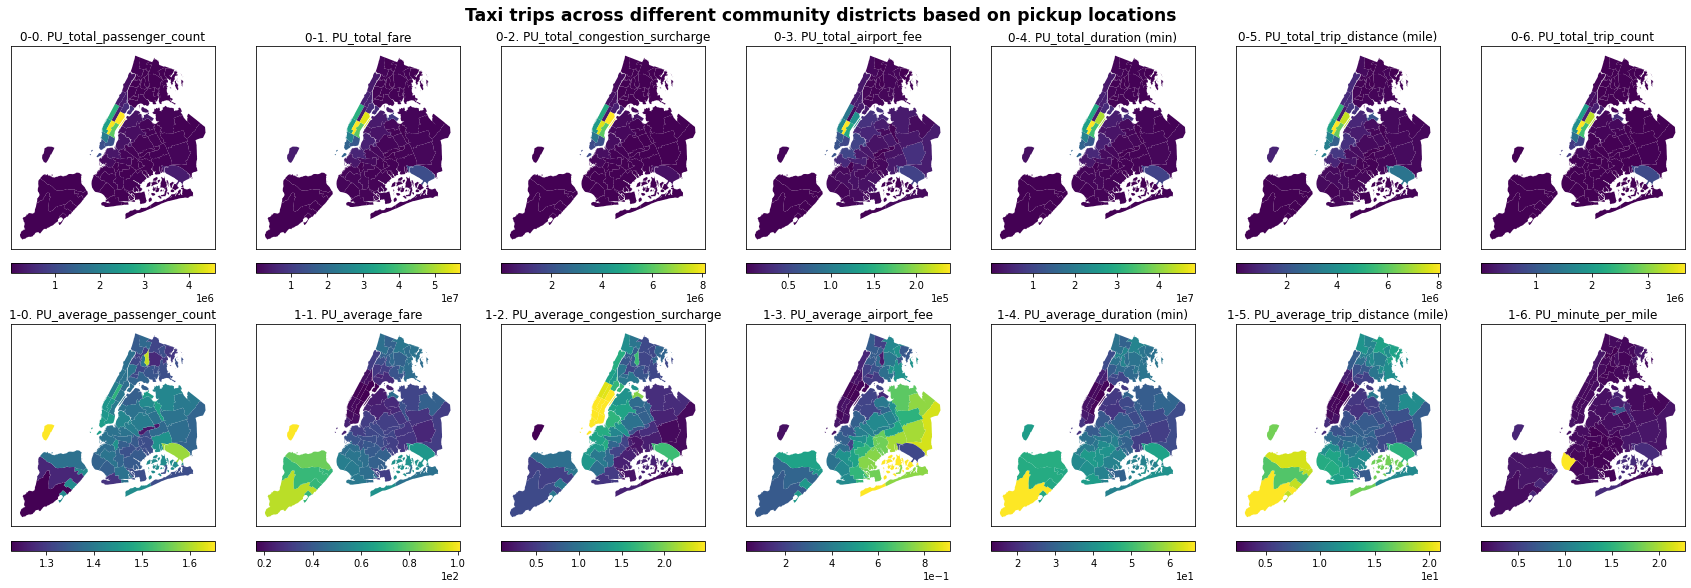

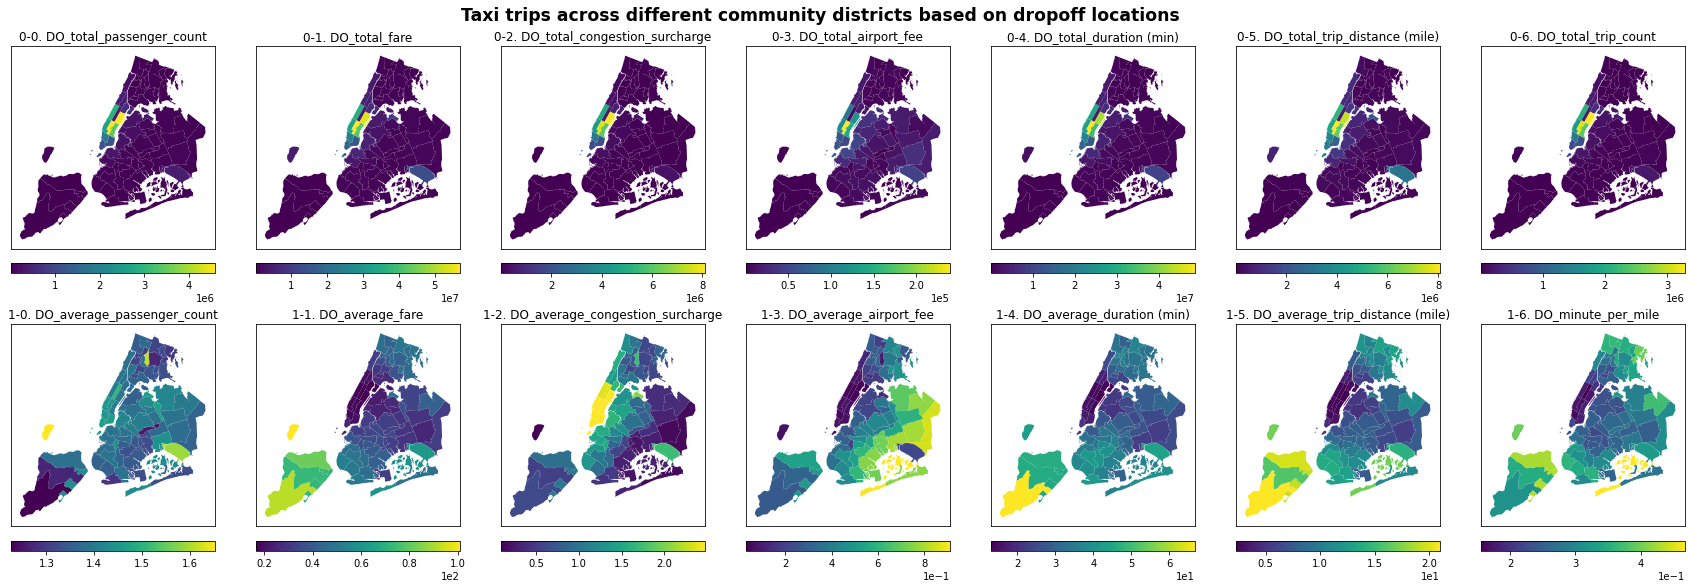

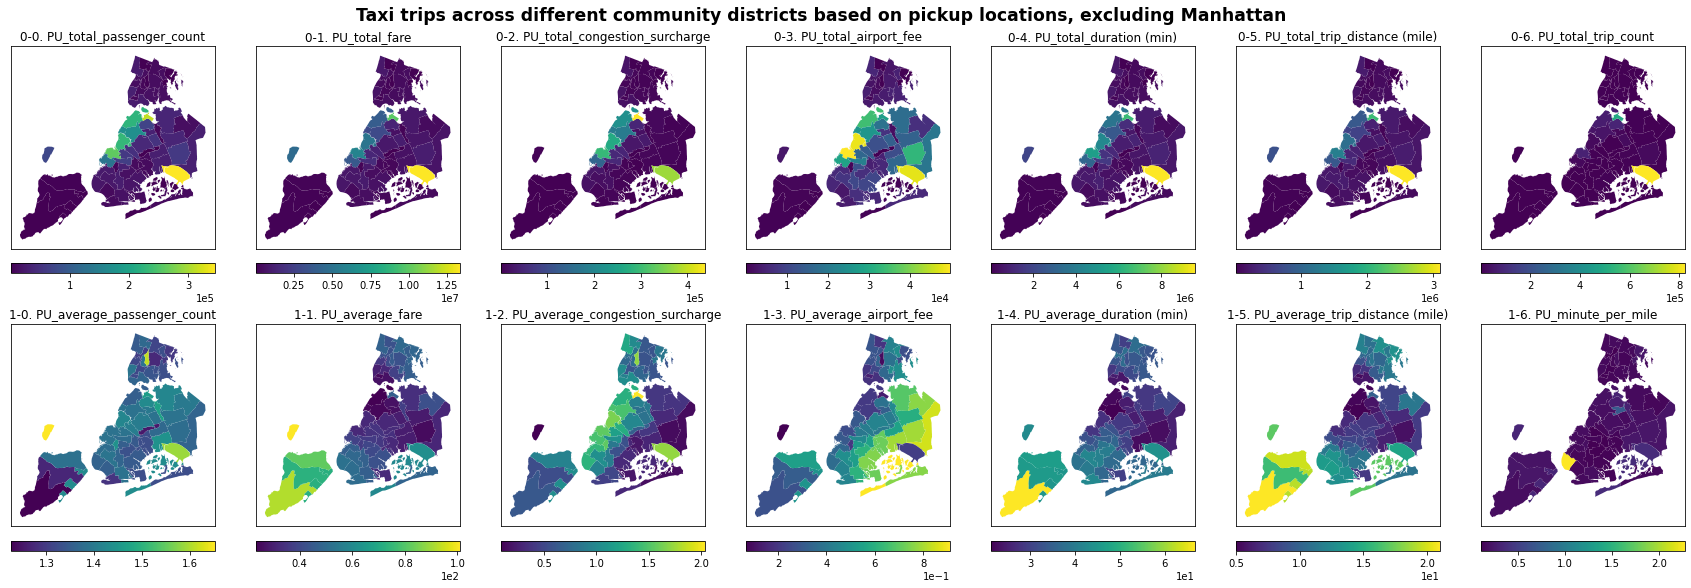

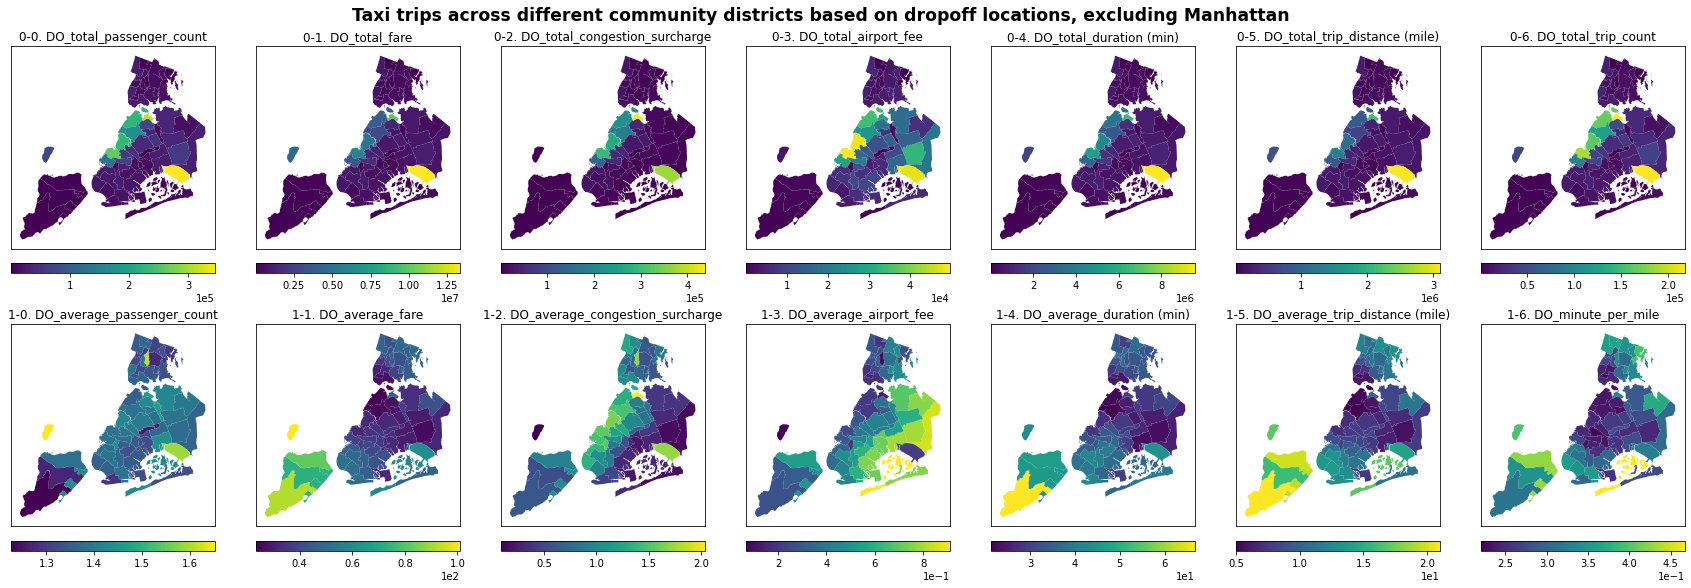

In [5]:
m = widgets.interactive(plot_on_map_interactive,
                        exclude_manhattan = [False, True])
display(m)

#### Findings:
- Due to a significantly higher number of trip counts in Manhattan (about 90% of all taxi trips happened from or to Manhattan), all the "total" variables do not seem quite useful in understanding how taxi trips differ in different boroughs and community districts.
- CDTAs with airports, namely JFK International Airport (QN83, ranked 9) and LaGuardia Airport (QN80), were ranked high in most of the total variables.
- Passenger count per trip (i.e. average passenger count) was quite equally distributed across different regions, with the range between 1.2 and 1.7. Interestingly though, the top 6 CDTAs have either a part or an airport.
- It appears that trips from or to Staten Island tend to be longer and more expensive.
- Not surprisingly, the total and average congestion surcharge were higher in Manhattan, followed by the districts with airports and the districts neighboring Manhattan.
- Distribution of minute per mile based on pickup and dropoff locations look quite different and there was an outlier in pickup minute per mile, which was Bay Ridge-Dyker Heights (BK10) with the value of 2.269505. Also, the variable didn't seem to be correlated with congestion (or congestion surcharge); longer minutes per mile were expected in the areas with frequent traffic congestion.
* Plots look very similar whether it's based on pickup or dropoff location, except for minute per mile. For this reason, each of the pickup and dropoff variables, excluding minute per mile, will be averaged and combined as a single variable in later analyses.

## 2.Top stations by Boroughs.

In [22]:
m = widgets.interactive(plot_frequent_stations_interactive, boroname = ["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten Island"])
display(m)

interactive(children=(Dropdown(description='boroname', options=('Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'S…